In [1]:
# create pybash macro
# https://stackoverflow.com/a/67029719/7782
from IPython import get_ipython
from IPython.core.magic import register_cell_magic

ipython = get_ipython()

@register_cell_magic
def pybash(line, cell):
    ipython.run_cell_magic('bash', '', cell.format(**globals()))

In [2]:
from pathlib import Path as P

import pandas as pd
import numpy as np
import geopandas as gpd
import folium



In [3]:
%%bash

cd ~/data/iSample/2024_07_10_15_51_57/ 

gpq describe isamples_export_2024_07_10_15_51_57_geo.parquet


╭───────────────────────────┬────────┬────────────┬────────────┬─────────────┬──────────┬────────────────┬──────────────────────────────────────┬────────────────╮
│ COLUMN                    │ TYPE   │ ANNOTATION │ REPETITION │ COMPRESSION │ ENCODING │ GEOMETRY TYPES │ BOUNDS                               │ DETAIL         │
├───────────────────────────┼────────┼────────────┼────────────┼─────────────┼──────────┼────────────────┼──────────────────────────────────────┼────────────────┤
│ sample_identifier         │ binary │ string     │ 0..1       │ snappy      │          │                │                                      │                │
│ label                     │ binary │ string     │ 0..1       │ snappy      │          │                │                                      │                │
│ description               │ binary │ string     │ 0..1       │ snappy      │          │                │                                      │                │
│ source_collection   

In [7]:
parquet_path = P.home() / 'data/iSample/2024_07_10_15_51_57/isamples_export_2024_07_10_15_51_57_geo.parquet'
# parquet_path = "cities.geoparquet"

# Step 1: Read the GeoParquet file
gdf = gpd.read_parquet(str(parquet_path))

# Step 2: Number of Records
num_records = len(gdf)
print(f"Number of records: {num_records}")

# Step 3: Bounding Box
bbox = gdf.total_bounds  # This gives [minx, miny, maxx, maxy] of the entire GeoDataFrame
print(f"Bounding Box: {bbox}")

# Step 4: Centroid
# This calculates the centroid of the combined geometries, not the average of centroids
combined_centroid = gdf.unary_union.centroid
print(f"Centroid: {combined_centroid.x}, {combined_centroid.y}")

Number of records: 213411
Bounding Box: [-179.933   -69.28    179.954    72.3787]
Centroid: -61.78523830030228, 20.18158821253222


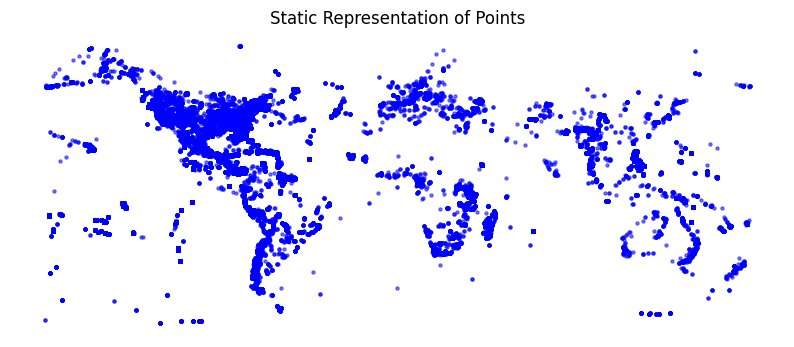

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the points
gdf.plot(ax=ax, marker='o', color='blue', markersize=5, alpha=0.5)

# Remove axis
ax.axis('off')

# Add a title
plt.title('Static Representation of Points')

# Show the plot
plt.show()

# Optionally, save the plot
# plt.savefig('points_plot.png', dpi=300, bbox_inches='tight')